<a href="https://colab.research.google.com/github/Taehee-K/Korean-Speech-Emotion-Recognition/blob/eda/visualization/distribution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [26]:
!pip install konlpy

In [14]:
import warnings 
warnings.filterwarnings('ignore')

In [15]:
import os
import pandas as pd
import missingno as msno

from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns

from konlpy.tag import *

# Load Data

In [16]:
path = os.path.dirname(os.path.abspath(__file__))
os.chdir(path)

In [17]:
df = pd.read_csv('./data/most_common.csv')
df.head()

,speech,emotion
0,개를 예쁘다고 사놓고 끝까지 키우지도 않고 버리는 사람들이 엄청 많아졌대.,Angry
1,지금도 그대로 있어. 치우는 사람이 없어.,Disgust
2,맞아. 무기력증인 것 같아. 한동안 정말 바빴었거든.,Sadness
3,오늘이 발표날인데 연락이 없더라고. 그래서 알아봤더니 명단에 내 이름이 없대.,Sadness
4,그치. 개 키우는 사람이 늘어나니까 그만큼 버리는 사람도 늘어나는 거야!,Angry


# Data Distribution
* Check missing values
* Visualize class distribution
* Plot data length distribution
* Count word frequency

## Check missing values

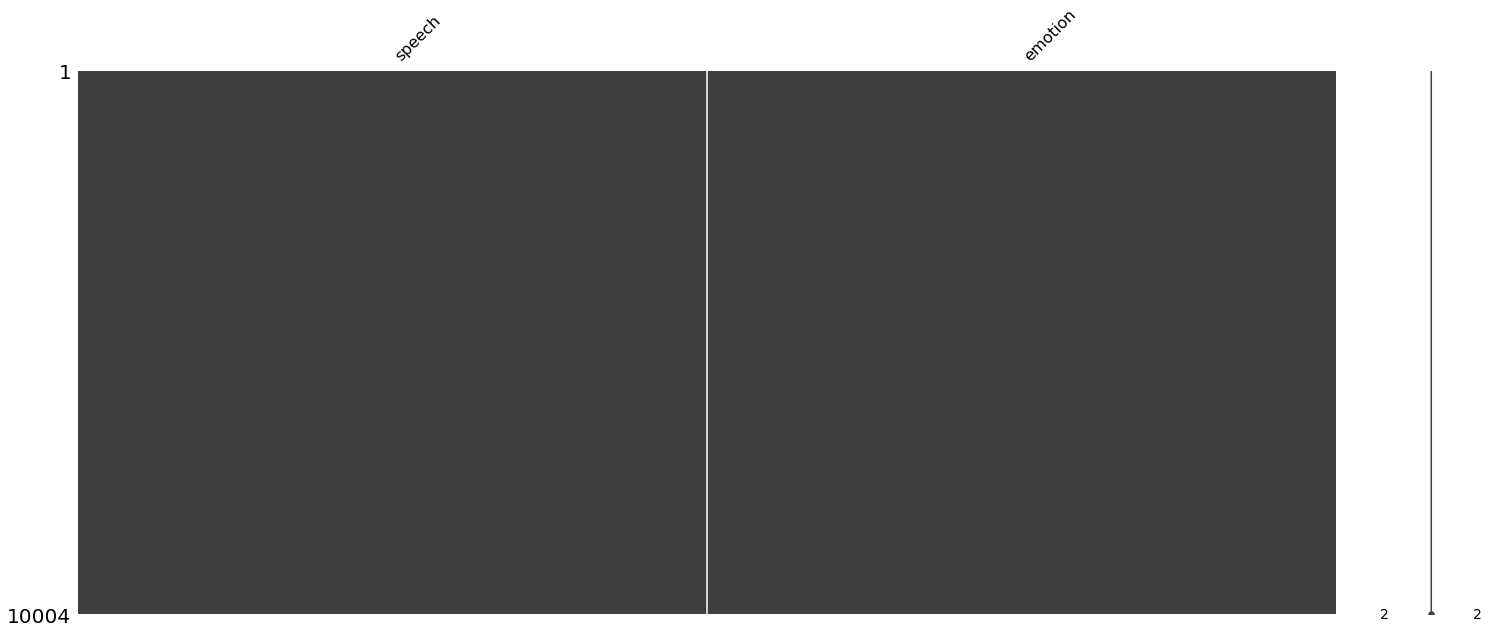

In [18]:
# Check for missing values >> none
msno.matrix(df)

## Visualize class distribution

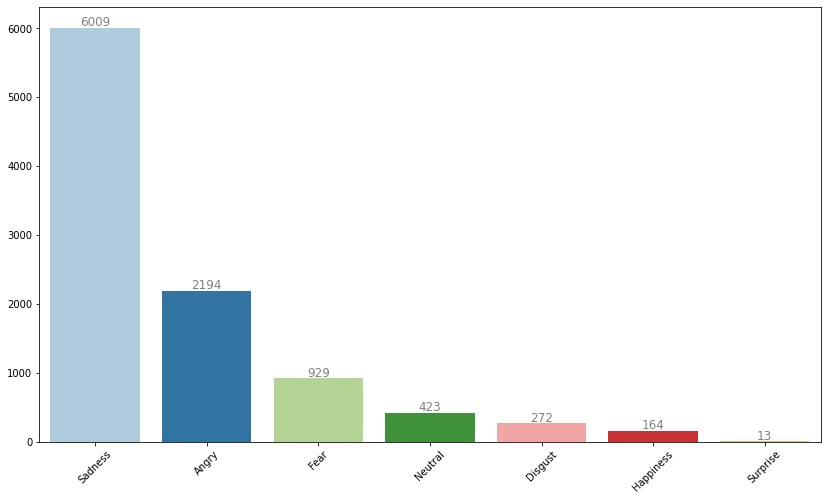

In [19]:
plt.figure(figsize=(14, 8))
plt.xticks(rotation = 45)
sns.set_palette('Paired')
ax = sns.barplot(df['emotion'].value_counts().index,
                df['emotion'].value_counts().values)
for p in ax.patches:
    ax.annotate("%d" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=12, color='grey', xytext=(0, 5),
                 textcoords='offset points')

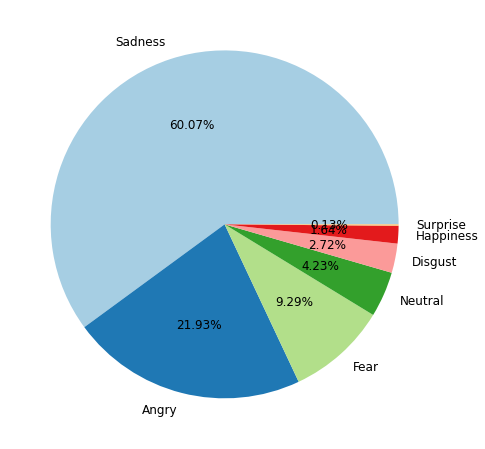

In [20]:
# Percentage of each emotion

count = Counter(df['emotion'])
ratio = [v/len(df) for v in sorted(count.values(), reverse = True)]
labels = [lb[0] for lb in Counter(df['emotion']).most_common()]

plt.figure(figsize = (14, 8))
plt.pie(ratio, 
        labels= labels, 
        autopct = '%.2f%%', 
        textprops={'fontsize':12})
plt.show()

## Plot data length distribution

In [23]:
def make_corpus(text):
    komoran = Komoran()
    corpus = []
    for s in text:
        s = s.rstrip()
        # 불용어 제거
        corpus.append([p[0] for p in komoran.pos(s) 
        if (p[0]!= '.' and p[1][0] != "J" and p[1] not in ['EP','EC', 'EF', 'ETN', 'ETM', 'XSN', 'XSV', 'XSA'])])
    return corpus

corpus = make_corpus(df['speech'].values)
vocab = sum(corpus, [])

발화문의 최대 길이 : 38
발화문의 평균 길이 : 9.423830467812875


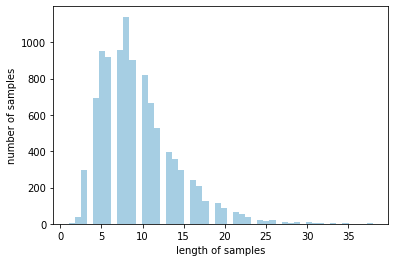

In [24]:
print('발화문의 최대 길이 :',max(len(l) for l in corpus))
print('발화문의 평균 길이 :',sum(len(l) for l in corpus)/len(corpus))
plt.hist([len(s) for s in corpus], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')

plt.rc('font', family='DejaVu Sans')
plt.show()

## Count word frequency

In [25]:
vocab_count = Counter(vocab)

threshold = 3
total_cnt = len(vocab_count)
rare_cnt = 0
total_freq = 0
rare_freq = 0

for key, value in vocab_count.items():
  total_freq = total_freq + value
  if value<threshold:
    rare_cnt = rare_cnt + 1
    rare_freq = rare_freq + value

print('단어 집합(vocabulary)의 크기 :',total_cnt)
print('등장 빈도가 %s번 이하인 희귀 단어의 수: %s'%(threshold - 1, rare_cnt))
print("단어 집합에서 희귀 단어의 비율: ", format(rare_cnt / total_cnt, ".2%"))
print("전체 등장 빈도에서 희귀 단어 등장 빈도 비율: ", format(rare_freq / total_freq, ".2%"))

단어 집합(vocabulary)의 크기 : 2248
등장 빈도가 2번 이하인 희귀 단어의 수: 984
단어 집합에서 희귀 단어의 비율:  43.77%
전체 등장 빈도에서 희귀 단어 등장 빈도 비율:  1.31%
